In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import pandas as pd
import sys

project_dir = os.sep.join([os.getcwd(), '..'])
sys.path.append(os.sep.join([project_dir, 'src', 'features']))
import build_features

%matplotlib inline

# Meteorological data

In [2]:
df_met = build_features.met_load_data(os.sep.join([project_dir, 'data', 'interim']))
df_met.describe()

air_temperature  max(wind_speed PT1H)  \
count     17074.000000          17074.000000   
mean         10.639382              3.531680   
std           7.827032              1.711191   
min         -14.100000              0.400000   
25%           4.500000              2.200000   
50%          11.800000              3.200000   
75%          16.300000              4.500000   
max          34.400000             12.600000   

       max_wind_speed(wind_from_direction PT1H)  relative_humidity  \
count                              17074.000000       17074.000000   
mean                                 129.836711          70.930596   
std                                   97.377514          20.618886   
min                                    1.000000          13.000000   
25%                                   33.000000          55.000000   
50%                                  142.000000          75.000000   
75%                                  209.000000          89.000000   
max                                  360.000000         100.000000   

       sum(duration_of_sunshine PT1H)  weather_type  \
count                    17056.000000   3847.000000   
mean                        15.582727     12.484533   
std                         23.973154     21.956990   
min                          0.000000      1.000000   
25%                          0.000000      2.000000   
50%                          0.000000      2.000000   
75%                         33.000000      3.000000   
max                         60.000000     91.000000   

       over_time(weather_type_primary_significance PT6H)  \
count                                        3831.000000   
mean                                            2.889063   
std                                             2.590697   
min                                             0.000000   
25%                                             2.000000   
50%                                             2.000000   
75%                                             6.000000   
max                                             9.000000   

       over_time(weather_type_secondary_significance PT6H)  \
count                                        3832.000000     
mean                                            1.509395     
std                                             1.570052     
min                                             0.000000     
25%                                             0.000000     
50%                                             2.000000     
75%                                             2.000000     
max                                             8.000000     

       sum(precipitation_amount PT1H)  
count                    17074.000000  
mean                         0.094155  
std                          0.501781  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                         17.100000

In [3]:
delete_original_columns = False
df_met = build_features.met_rename_columns(df_met)

## Wind direction

In [4]:
df_met = build_features.met_transform_wind_direction(df_met, delete_original=delete_original_columns)

In [5]:
df_met[['wind_direction', 'wind_direction_cat'] if not delete_original_columns else ['wind_direction_cat']].head(10)

wind_direction  wind_direction_cat
0           335.0                   7
1           354.0                   0
2           358.0                   0
3            42.0                   1
4           244.0                   5
5           205.0                   5
6           141.0                   3
7           200.0                   4
8           203.0                   5
9           201.0                   4

In [6]:
df_met.head(5)

index  temperature  wind_speed  wind_direction  \
0 2016-04-01 00:00:00+00:00          2.1         6.0           335.0   
1 2016-04-01 01:00:00+00:00          2.2         5.7           354.0   
2 2016-04-01 02:00:00+00:00          0.7         5.8           358.0   
3 2016-04-01 03:00:00+00:00         -0.3         2.0            42.0   
4 2016-04-01 04:00:00+00:00         -1.8         2.2           244.0   

   humidity  sunshine  weather1  weather2  weather3  precipitation  \
0      46.0       0.0       1.0       2.0       0.0            0.0   
1      45.0       0.0       NaN       NaN       NaN            0.0   
2      51.0       0.0       NaN       NaN       NaN            0.0   
3      55.0       0.0       2.0       0.0       0.0            0.0   
4      62.0       0.0       NaN       NaN       NaN            0.0   

   wind_direction_cat  
0                   7  
1                   0  
2                   0  
3                   1  
4                   5

## Weather features

In [7]:
df_met.describe()

temperature    wind_speed  wind_direction      humidity      sunshine  \
count  17074.000000  17074.000000    17074.000000  17074.000000  17056.000000   
mean      10.639382      3.531680      129.836711     70.930596     15.582727   
std        7.827032      1.711191       97.377514     20.618886     23.973154   
min      -14.100000      0.400000        1.000000     13.000000      0.000000   
25%        4.500000      2.200000       33.000000     55.000000      0.000000   
50%       11.800000      3.200000      142.000000     75.000000      0.000000   
75%       16.300000      4.500000      209.000000     89.000000     33.000000   
max       34.400000     12.600000      360.000000    100.000000     60.000000   

          weather1     weather2     weather3  precipitation  \
count  3847.000000  3831.000000  3832.000000   17074.000000   
mean     12.484533     2.889063     1.509395       0.094155   
std      21.956990     2.590697     1.570052       0.501781   
min       1.000000     0.000000     0.000000       0.000000   
25%       2.000000     2.000000     0.000000       0.000000   
50%       2.000000     2.000000     2.000000       0.000000   
75%       3.000000     6.000000     2.000000       0.000000   
max      91.000000     9.000000     8.000000      17.100000   

       wind_direction_cat  
count        17074.000000  
mean             2.761450  
std              2.070075  
min              0.000000  
25%              1.000000  
50%              3.000000  
75%              5.000000  
max              7.000000

In [15]:
df_met[['index', 'weather1', 'weather2', 'weather3']].head(72).tail(4)

index  weather1  weather2  weather3
68 2016-04-03 21:00:00+00:00      58.0       6.0       5.0
69 2016-04-03 22:00:00+00:00       NaN       NaN       NaN
70 2016-04-03 23:00:00+00:00       NaN       NaN       NaN
71 2016-04-04 00:00:00+00:00       NaN       NaN       NaN

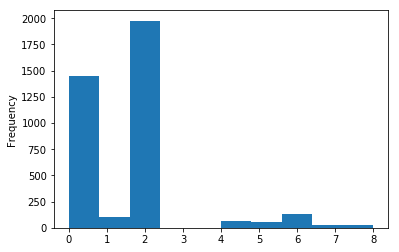

In [8]:
import functools
import matplotlib.pyplot as plt
weather_codes = functools.reduce(lambda a, b: a | set(df_met[b].dropna().values), ['weather1', 'weather2', 'weather3'], set())
df_met.weather3.plot.hist()

In [9]:
df_met = build_features.met_transform_weather(df_met, delete_original=delete_original_columns)

In [10]:
df_met.describe()

temperature    wind_speed  wind_direction      humidity      sunshine  \
count  17074.000000  17074.000000    17074.000000  17074.000000  17056.000000   
mean      10.639382      3.531680      129.836711     70.930596     15.582727   
std        7.827032      1.711191       97.377514     20.618886     23.973154   
min      -14.100000      0.400000        1.000000     13.000000      0.000000   
25%        4.500000      2.200000       33.000000     55.000000      0.000000   
50%       11.800000      3.200000      142.000000     75.000000      0.000000   
75%       16.300000      4.500000      209.000000     89.000000     33.000000   
max       34.400000     12.600000      360.000000    100.000000     60.000000   

          weather1     weather2     weather3  precipitation  \
count  3847.000000  3831.000000  3832.000000   17074.000000   
mean     12.484533     2.889063     1.509395       0.094155   
std      21.956990     2.590697     1.570052       0.501781   
min       1.000000     0.000000     0.000000       0.000000   
25%       2.000000     2.000000     0.000000       0.000000   
50%       2.000000     2.000000     2.000000       0.000000   
75%       3.000000     6.000000     2.000000       0.000000   
max      91.000000     9.000000     8.000000      17.100000   

       wind_direction_cat  weather_fair/cloudy  weather_fog/haze  \
count        17074.000000          17074.00000      17074.000000   
mean             2.761450              0.62522          0.211491   
std              2.070075              0.48408          0.408378   
min              0.000000              0.00000          0.000000   
25%              1.000000              0.00000          0.000000   
50%              3.000000              1.00000          0.000000   
75%              5.000000              1.00000          0.000000   
max              7.000000              1.00000          1.000000   

       weather_thunderstorm  weather_rain  weather_snow  weather_other  
count          17074.000000  17074.000000  17074.000000   17074.000000  
mean               0.002636      0.111632      0.018508       0.000176  
std                0.051272      0.314922      0.134782       0.013255  
min                0.000000      0.000000      0.000000       0.000000  
25%                0.000000      0.000000      0.000000       0.000000  
50%                0.000000      0.000000      0.000000       0.000000  
75%                0.000000      0.000000      0.000000       0.000000  
max                1.000000      1.000000      1.000000       1.000000

In [11]:
df_met['weather_fair/cloudy'].sum() + df_met['weather_fog/haze'].sum() + df_met['weather_thunderstorm'].sum() + df_met['weather_rain'].sum() + df_met['weather_snow'].sum() + df_met['weather_other'].sum()

16556.0

In [12]:
len(df_met)

17074

In [13]:
for id, row in df_met.iterrows():
    if (row['weather_fair/cloudy'] == 0 and row['weather_fog/haze'] == 0 and row['weather_thunderstorm'] == 0 and row['weather_rain'] == 0 and row['weather_snow'] == 0 and row['weather_other'] == 0):
        print(id, row)

71 index                   2016-04-04 00:00:00+00:00
temperature                                   5.7
wind_speed                                      2
wind_direction                                 46
humidity                                       92
sunshine                                        0
weather1                                      NaN
weather2                                      NaN
weather3                                      NaN
precipitation                                   0
wind_direction_cat                              1
weather_fair/cloudy                             0
weather_fog/haze                                0
weather_thunderstorm                            0
weather_rain                                    0
weather_snow                                    0
weather_other                                   0
Name: 71, dtype: object
72 index                   2016-04-04 01:00:00+00:00
temperature                                   5.5
wind_speed          